##A1

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(2)

X_train = np.array([
    [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
     2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
]).T  # Chuyển vị để đảm bảo X có shape (20,1)

y_train = np.array([
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
]).T  # Chuyển vị để đảm bảo y có shape (20,1)



K = 3:
  Student 21: Predicted Score = 0.67
  Student 22: Predicted Score = 0.33
  Student 23: Predicted Score = 0.67
  Student 24: Predicted Score = 0.33
  Student 25: Predicted Score = 1.00

K = 4:
  Student 21: Predicted Score = 0.50
  Student 22: Predicted Score = 0.25
  Student 23: Predicted Score = 0.75
  Student 24: Predicted Score = 0.50
  Student 25: Predicted Score = 0.75

K = 5:
  Student 21: Predicted Score = 0.40
  Student 22: Predicted Score = 0.40
  Student 23: Predicted Score = 0.80
  Student 24: Predicted Score = 0.40
  Student 25: Predicted Score = 0.80


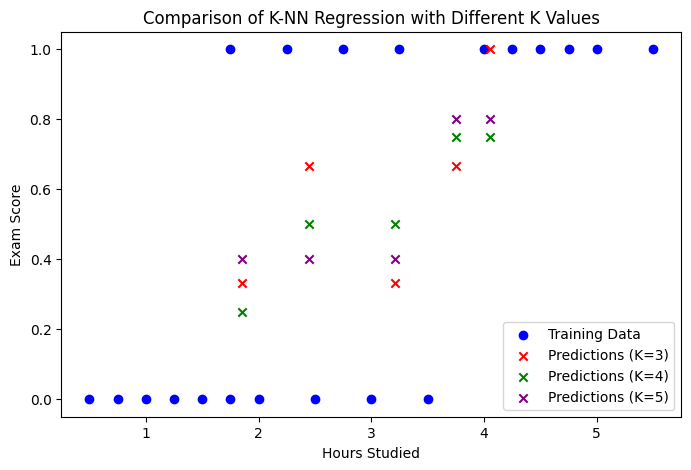

In [206]:
import numpy as np
import matplotlib.pyplot as plt

def knn_regression(X_train, y_train, X_test, k):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)

    y_pred = []

    for x in X_test:
        # Tính khoảng cách Euclidean
        distances = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
        # Lấy K điểm gần nhất
        nearest_neighbors = np.argsort(distances)[:k]
        # Trung bình giá trị y của K điểm gần nhất
        y_pred.append(np.mean(y_train[nearest_neighbors]))

    return np.array(y_pred)

# Dữ liệu cần dự đoán
X_test = np.array([[2.45], [1.85], [3.75], [3.21], [4.05]])

# Thử nghiệm với K = 3, 4, 5
k_values = [3, 4, 5]
predictions = {}

for k in k_values:
    predictions[k] = knn_regression(X_train, y_train, X_test, k)

# Hiển thị kết quả
for k, y_pred in predictions.items():
    print(f"\nK = {k}:")
    for i, pred in enumerate(y_pred):
        print(f"  Student {21 + i}: Predicted Score = {pred:.2f}")

# Vẽ biểu đồ so sánh
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
colors = ['red', 'green', 'purple']

for i, k in enumerate(k_values):
    plt.scatter(X_test, predictions[k], color=colors[i], label=f"Predictions (K={k})", marker="x")

plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.title("Comparison of K-NN Regression with Different K Values")
plt.show()


##B1

In [207]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

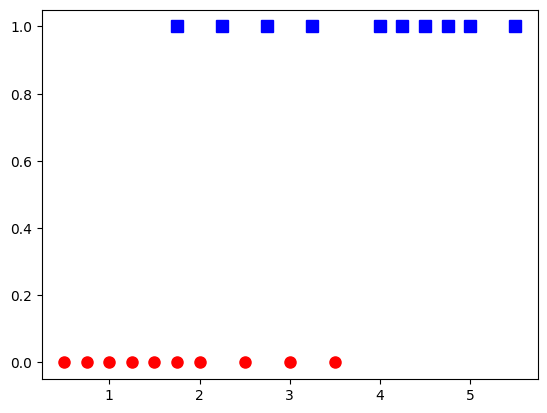

In [208]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [209]:
import numpy as np

def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000):
    w = [w_init]
    count = 0
    check_w_after = 20
    N = X.shape[1]
    d = X.shape[0]

    while count < max_count:
        mix_id = np.random.permutation(N)

        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi

            count += 1

            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w

            w.append(w_new)

    return w


In [210]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


In [211]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


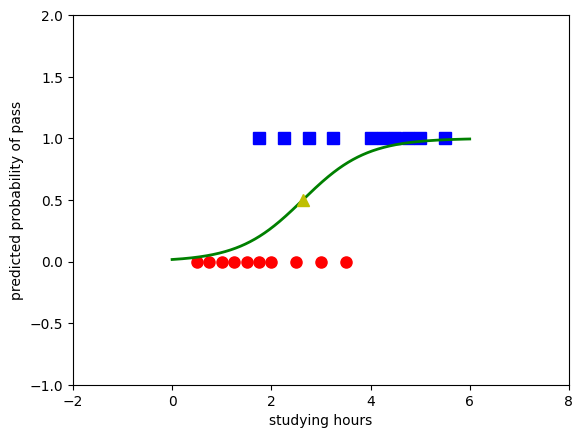

In [212]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [213]:
print(w1)

1.5527724167089776


In [214]:
# Danh sách số giờ học của sinh viên mới
X_new = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]])
# X_new = np.concatenate((np.ones((1, X_new.shape[1])), X_new), axis=0)

# Dự đoán xác suất
y_pred_prob = sigmoid(w0 + w1*X_new)
y_pred_label = (y_pred_prob >= 0.5).astype(int)

print("Xác suất đỗ của từng sinh viên:", y_pred_prob)
print("Kết quả dự đoán (0: rớt, 1: đỗ):", y_pred_label)


Xác suất đỗ của từng sinh viên: [[0.42839499 0.22792483 0.8494382  0.70924179 0.89989273]]
Kết quả dự đoán (0: rớt, 1: đỗ): [[0 0 1 1 1]]


##B2

In [215]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20

In [216]:
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

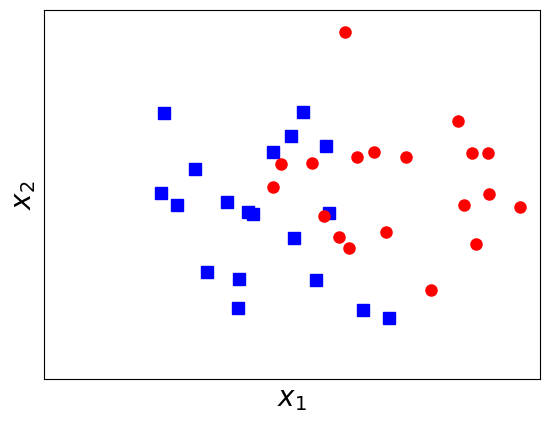

In [217]:
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [218]:
import numpy as np

def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000):
    w = [w_init]
    count = 0
    check_w_after = 20
    N = X.shape[1]
    d = X.shape[0]

    while count < max_count:
        mix_id = np.random.permutation(N)

        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi

            count += 1

            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w

            w.append(w_new)

    return w


In [219]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init

In [220]:
# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


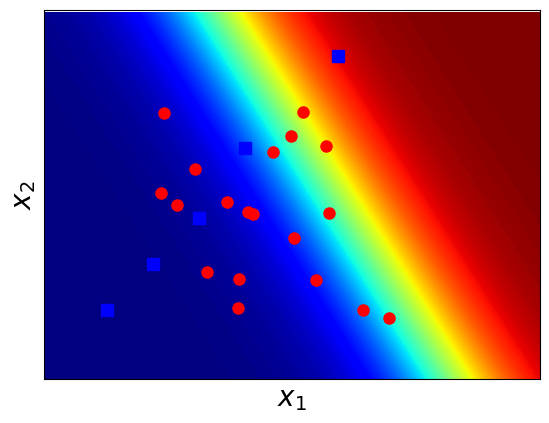

In [221]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
X0 = X0.reshape(-1, 2)  # Chuyển về dạng (N, 2)
X1 = X1.reshape(-1, 2)

# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)

##B3

###a. Phân loại bằng phương pháp hồi quy Logistic

In [222]:
# importing module
import numpy as np
from pandas import *
# reading CSV file
data = read_csv("/content/Admission_Predict.csv")
# converting column data to list, then convert list to array

In [223]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [224]:
sn = data['Serial No.'].tolist()

gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)

unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)

sop = data['SOP'].tolist()
X4 = np.asarray(sop)

lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1)

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)

research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)

prob_Admit = data['Chance of Admit'].tolist()
Yt = np.asarray(prob_Admit)
# printing list data

In [225]:
from scipy.special import expit  # sigmoid function

# Hàm sigmoid
def sigmoid(z):
    return expit(z)

# Hàm hồi quy logistic sử dụng Gradient Descent
def logistic_regression(X, Y, lr=0.01, epochs=10000):
    m, n = X.shape
    theta = np.zeros((n, 1))  # Khởi tạo vector tham số
    for _ in range(epochs):
        z = X @ theta
        h = sigmoid(z)
        gradient = (X.T @ (h - Y)) / m
        theta -= lr * gradient  # Gradient Descent
    return theta

####i

In [226]:
# Chuyển đổi nhãn 'Chance of Admit' thành nhị phân
data['Admit_Class'] = (data['Chance of Admit'] >= 0.75).astype(int)

# Lấy 350 dòng đầu làm tập train, phần còn lại làm tập test
train_data = data.iloc[:350]
test_data = data.iloc[350:]

####ii

In [227]:
# Tạo ma trận đặc trưng X (7 features)
X_train = train_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
X_test = test_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values

####iii

In [228]:
# Thêm cột bias X0 = 1
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

####iv

In [229]:
# Nhãn đầu ra
Y_train = train_data['Admit_Class'].values.reshape(-1, 1)
Y_test = test_data['Admit_Class'].values.reshape(-1, 1)

# Huấn luyện mô hình hồi quy logistic
theta = logistic_regression(X_train, Y_train, lr=0.01, epochs=10000)

####v

In [230]:
# In ra các hệ số tìm được
print("Hệ số hồi quy logistic:")
print(theta.flatten())

# Dự đoán trên tập test
Y_pred_prob = sigmoid(X_test @ theta)
Y_pred = (Y_pred_prob >= 0.5).astype(int)  # Chuyển về 0 hoặc 1

# Tính các chỉ số đánh giá
TP = np.sum((Y_pred == 1) & (Y_test == 1))
TN = np.sum((Y_pred == 0) & (Y_test == 0))
FP = np.sum((Y_pred == 1) & (Y_test == 0))
FN = np.sum((Y_pred == 0) & (Y_test == 1))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Hệ số hồi quy logistic:
[ -1.14016159 -13.21028797  38.01740489  27.65888054  21.03224621
  17.83044118   8.7364824   11.11523764]
Accuracy: 0.6000
Precision: 0.5238
Recall: 1.0000


###b. sử dụng hồi quy tuyến tính

In [231]:
# Hàm QR decomposition bằng Householder Reflection (sửa lỗi chia 0)
def qr_householder(A):
    M, N = A.shape
    Q = np.identity(M)
    R = np.copy(A)

    for n in range(N):
        x = R[n:, n]
        k = x.shape[0]
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        if np.isclose(x[0], ro):  # Tránh chia cho 0
            continue

        e = np.zeros(k)
        e[0] = 1
        v = (x - (ro * e)) / (x[0] - ro)

        for i in range(N):
            R[n:, i] -= (2 / (v @ v)) * ((np.outer(v, v)) @ R[n:, i])

        for i in range(M):
            Q[n:, i] -= (2 / (v @ v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.T, R

In [232]:
def linear_regression(x_data, y_data):
# """
# This function calculate linear regression base on x_data and y_data
# :param x_data: vector
# :param y_data: vector
# :return: w (regression estimate)
# """

# add column 1
  x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

  Q, R = qr_householder(x_bars) # QR decomposition
  R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
  A = np.dot(R_pinv, Q.T) # apply formula

  return np.dot(A, y_data)

In [233]:
 # Chia tập dữ liệu (350 train, còn lại test)
train_data = data.iloc[:350]
test_data = data.iloc[350:]

# Tạo ma trận đặc trưng X
X_train = train_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
X_test = test_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values

# Nhãn đầu ra
Y_train = train_data['Chance of Admit'].values.reshape(-1, 1)
Y_test = test_data['Chance of Admit'].values.reshape(-1, 1)

# Huấn luyện mô hình hồi quy tuyến tính
theta = linear_regression(X_train, Y_train)

# Dự đoán trên tập test
X_test_bar = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
Y_pred = X_test_bar @ theta

# Tính trung bình bình phương sai số (MSE)
mse = np.mean((Y_pred - Y_test) ** 2)

# In kết quả
print("Hệ số hồi quy tuyến tính:")
print(theta.flatten())
print(f"Trung bình bình phương sai số (MSE): {mse:.6f}")

Hệ số hồi quy tuyến tính:
[-1.19503649  0.00154891  0.00324646  0.00931544 -0.00438297  0.02493287
  0.11235144  0.02194172]
Trung bình bình phương sai số (MSE): 0.004642


###c. Sử dụng Gaussian Naive Bayes

In [234]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Tạo nhãn phân loại (0: không đậu, 1: đậu)
data['Admit_Class'] = (data['Chance of Admit'] >= 0.75).astype(int)
# Nhãn phân loại
Y_train = train_data['Admit_Class'].values
Y_test = test_data['Admit_Class'].values

# Khởi tạo và huấn luyện mô hình Gaussian Naïve Bayes
model = GaussianNB()
model.fit(X_train, Y_train)

# Dự đoán trên tập test
Y_pred = model.predict(X_test)

# Tính độ chính xác, Precision, Recall
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

# In kết quả
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9000
Precision: 0.9474
Recall: 0.8182


###d. sử dụng thư viện sklearn

In [235]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Khởi tạo mô hình Logistic Regression (Không dùng Regularization)
logReg = linear_model.LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)

# Huấn luyện mô hình
logReg.fit(X_train, Y_train)

# Dự đoán trên tập test
Y_pred = logReg.predict(X_test)

# Hiển thị hệ số hồi quy
print("Hệ số hồi quy logistic:")
print(logReg.coef_)

# Tính các chỉ số Accuracy, Precision, Recall
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Hệ số hồi quy logistic:
[[0.03753281 0.10181321 0.44615197 0.3753819  0.56441957 3.33575522
  0.92365694]]
Accuracy: 0.9000
Precision: 0.9474
Recall: 0.8182


##B4

In [236]:
import pandas as pd
# change to your data's path
data=pd.read_csv("/content/banking.csv")
data.head()
# convert field of 'month'
dict_month = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}
data['month'] = data['month'].map(dict_month)
# convert field of dayOfweek
dict_day = {'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6,
'sat' : 7}
data['day_of_week'] = data['day_of_week'].map(dict_day)
# conver binary fields
#default :
data['default'].replace({'no': 0, 'yes': 1}, inplace=True)


<ipython-input-236-46a918559ae7>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['default'].replace({'no': 0, 'yes': 1}, inplace=True)


In [237]:
#housing :
data['housing'].replace({'no': 0, 'yes': 1}, inplace=True)

#loan :
data['loan'].replace({'no': 0, 'yes': 1}, inplace=True)

# convert categories field by one host coding
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)
job_dummies = pd.get_dummies(data['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
data= pd.concat([data, job_dummies], axis=1)
education_dummies = pd.get_dummies(data['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)
contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact')
#contact_dummies.drop('contact_unknown', axis=1, inplace=True)
data = pd.concat([data, contact_dummies], axis=1)
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
#poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
data = pd.concat([data, poutcome_dummies], axis=1)
data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1,inplace=True)

<ipython-input-237-559290fabdb4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['housing'].replace({'no': 0, 'yes': 1}, inplace=True)
<ipython-input-237-559290fabdb4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [238]:
data = data[data['default'] != 'unknown']
data = data[data['loan'] != 'unknown']
data = data[data['housing'] != 'unknown']

In [239]:
data

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
1,53,0,0,0,11,6,138,1,1,0,...,False,False,False,False,False,True,False,False,True,False
2,28,0,1,0,6,5,339,3,1,2,...,False,False,False,False,True,True,False,False,False,True
3,39,0,0,0,4,6,185,2,1,0,...,False,True,False,False,False,True,False,False,True,False
4,55,0,1,0,8,6,137,1,1,1,...,False,False,False,False,False,True,False,False,False,True
5,30,0,1,0,7,3,68,8,1,0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,29,0,1,0,5,2,214,1,1,0,...,True,False,False,False,False,True,False,False,True,False
41181,39,0,0,0,11,3,123,2,1,0,...,False,False,False,False,True,True,False,False,True,False
41182,24,0,1,0,5,5,118,4,1,1,...,False,True,False,False,False,True,False,True,False,False
41186,48,0,0,1,10,3,200,2,1,0,...,False,False,False,True,False,False,True,False,True,False


In [240]:
# Danh sách các cột dạng bool cần chuyển đổi thành 0/1
bool_columns = [
    'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
    'education_high.school', 'education_illiterate', 'education_professional.course', 'contact_telephone', 'poutcome_failure', 'poutcome_success', 'marital_single', 'marital_unknown',
    'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management',
    'job_retired', 'job_self-employed', 'job_services', 'job_student',
    'job_technician', 'job_unemployed', "marital_married", "job_admin.", "poutcome_nonexistent", "contact_cellular", "education_university.degree"
]

# Chuyển đổi từ True/False thành 1/0
data[bool_columns] = data[bool_columns].astype(int)

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
print(data.dtypes)


age                                int64
default                           object
housing                           object
loan                              object
month                              int64
day_of_week                        int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp_var_rate                     float64
cons_price_idx                   float64
cons_conf_idx                    float64
euribor3m                        float64
nr_employed                      float64
y                                  int64
marital_married                    int64
marital_single                     int64
marital_unknown                    int64
job_admin.                         int64
job_blue-collar                    int64
job_entrepreneur                   int64
job_housemaid                      int64
job_management                     int64
job_retired     

In [241]:
# # Danh sách các cột thuộc nhóm education
# education_cols = [
#     'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
#     'education_high.school', 'education_illiterate',
#     'education_professional.course', 'education_university.degree'
# ]

# # Gộp thành một cột chứa vector dạng list
# data['education'] = data[education_cols].values.tolist()

# # Xóa các cột cũ
# data.drop(columns=education_cols, inplace=True)

# poutcome_cols = ['poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

# job_cols = [
#     'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
#     'job_management', 'job_retired', 'job_self-employed', 'job_services',
#     'job_student', 'job_technician', 'job_unemployed'
# ]

# data["poutcome"] = data[poutcome_cols].values.tolist()
# data.drop(columns=poutcome_cols, inplace=True)

# data['job'] = data[job_cols].values.tolist()
# data.drop(columns=job_cols, inplace=True)

In [242]:
from sklearn.model_selection import train_test_split

# Giả sử dữ liệu đã được xử lý và lưu vào DataFrame `data`
# Biến mục tiêu (label) là 'y'
X = data.drop(columns=['y'])  # Bỏ cột y, chỉ giữ lại các đặc trưng (features)
y = data['y']  # Nhãn (target)

# Chia dữ liệu theo tỷ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Với phần test, ta không dùng y_test cho việc huấn luyện
X_test_no_labels = X_test.copy()


###a. Dùng hồi quy logistic

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Khởi tạo và huấn luyện mô hình
log_reg = LogisticRegression(max_iter=5000, random_state=42)
start_time = time.time()
log_reg.fit(X_train, y_train)
end_time = time.time()

#Tính thời gian huấn luyện
log_reg_time = end_time-start_time
# Dự đoán trên tập Test
y_pred_logreg = log_reg.predict(X_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Logistic Regression Metrics:
Accuracy: 0.8973
Precision: 0.6756
Recall: 0.3968
F1-score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###b.Dùng gaussian naive bayes

In [244]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Khởi tạo mô hình
nb_model = GaussianNB()
start_time = time.time()
# Huấn luyện mô hình trên tập Training
nb_model.fit(X_train, y_train)
end_time = time.time()
#Tính thời gian huấn luyên
nb_model_time = end_time-start_time
# Dự đoán trên tập Test
y_pred_nb = nb_model.predict(X_test)

# Đánh giá hiệu suất
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naïve Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")


Naïve Bayes Metrics:
Accuracy: 0.8126
Precision: 0.3542
Recall: 0.5437
F1-score: 0.4289


###c. So sánh thời gian chạy và độ chính xác

In [245]:
print(f"Thời gian huấn luyện Logistic Regression: {log_reg_time:.4f} giây")
print(f"Thời gian huấn luyện Gaussian Naive Bayes: {nb_model_time:.4f} giây")
print("Nhận xét: Độ chính xác của 2 mô hình tương đương nhau")

Thời gian huấn luyện Logistic Regression: 26.7098 giây
Thời gian huấn luyện Gaussian Naive Bayes: 0.1334 giây
Nhận xét: Độ chính xác của 2 mô hình tương đương nhau


##B6

In [246]:
df = pd.read_csv("/content/framingham.csv")
df.head()
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [247]:
df=df.dropna(how="any", axis=0)

In [248]:
x = df.iloc[:,:-1]
y = df.iloc[:, [-1]]

In [249]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [250]:
# Khởi tạo và huấn luyện mô hình
log_reg = LogisticRegression(max_iter=5000, random_state=123)
log_reg.fit(x_train, y_train)

# Dự đoán trên tập Test
y_pred_logreg = log_reg.predict(x_val)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_val, y_pred_logreg)
precision = precision_score(y_val, y_pred_logreg)
recall = recall_score(y_val, y_pred_logreg)
f1 = f1_score(y_val, y_pred_logreg)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Metrics:
Accuracy: 0.8469
Precision: 0.6071
Recall: 0.0977
F1-score: 0.1683
